The Scottish hill data set is available from the MASS package via data(hills). The MASS package should come standard with your R installation. The Scottish hill dataset recorded winning times for 33 races in Scotland. There are three variables, namely time, dist (distance in miles) and climb (hill climbing in feet).
(a) First fit a linear regression model using time as the response variable and dist and climb as the predictor variables, that is, fit the model time =  0 +  1dist +  2climb.
(b) Perform some quick diagnostic based on the residuals. Are there any influential points or outliers ?

In [13]:
library(MASS)
data(hills)
n <- length(hills$time)
lm <- lm(time ~ dist + climb, data=hills)
(lms <- summary(lm))
p <- 3


Call:
lm(formula = time ~ dist + climb, data = hills)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.215  -7.129  -1.186   2.371  65.121 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.992039   4.302734  -2.090   0.0447 *  
dist         6.217956   0.601148  10.343 9.86e-12 ***
climb        0.011048   0.002051   5.387 6.45e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.68 on 32 degrees of freedom
Multiple R-squared:  0.9191,	Adjusted R-squared:  0.914 
F-statistic: 181.7 on 2 and 32 DF,  p-value: < 2.2e-16


Knock Hill 
  4.565581

Bens of Jura   Knock Hill 
    3.168980     7.610845

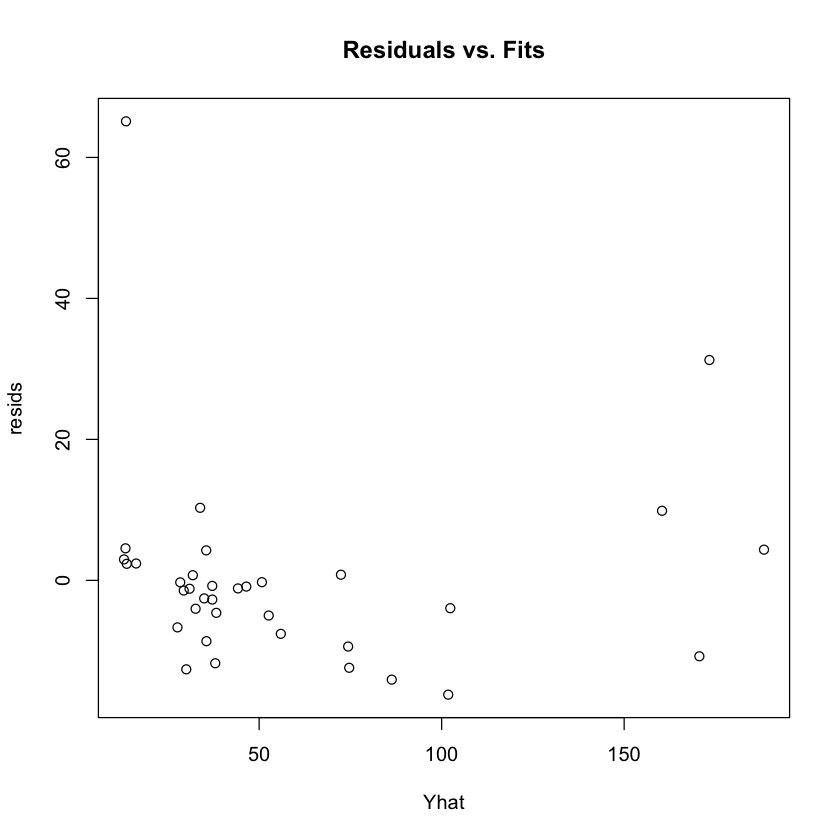

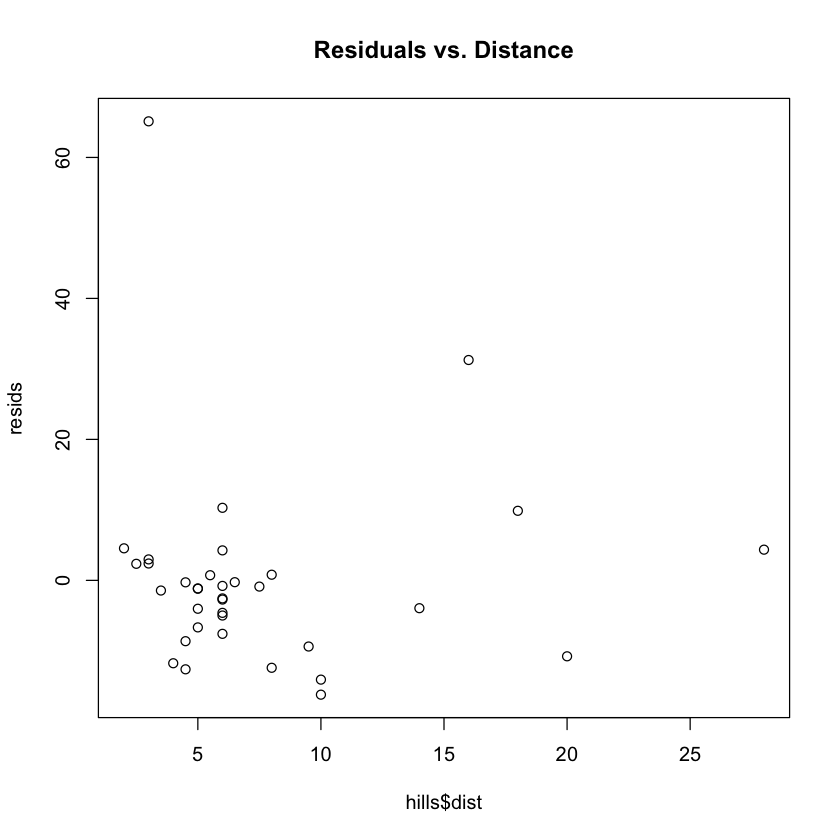

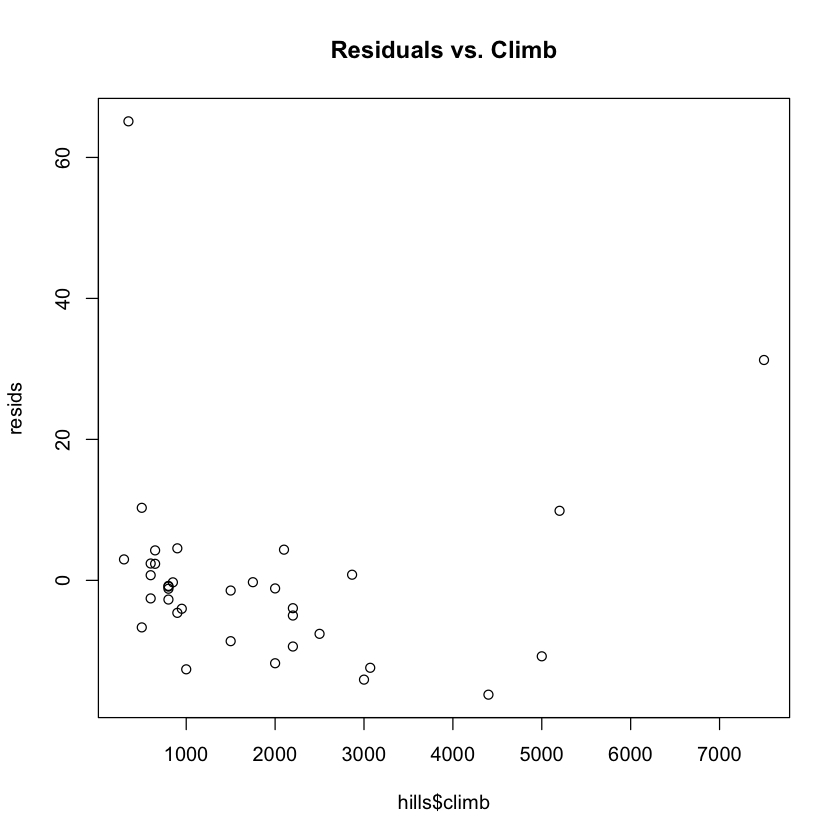

In [14]:
Yhat <- lm$fitted
resids <- lm$residuals

stdres = rstandard(lm)
stdres[which(abs(stdres) > 3)]

stures = rstudent(lm)
stures[which(abs(stures) > 3)]

plot(Yhat, resids, main='Residuals vs. Fits')
plot(hills$dist, resids, main = 'Residuals vs. Distance')
plot(hills$climb, resids, main = 'Residuals vs. Climb')

The data seem to suggest 1, possibly 2, outliers that are really much farther away than all of the other data points. Those points are Bens of Jura which could be considered an outlier and Knock Hill, which I think should be considered an outlier.

Bens of Jura  Lairig Ghru   Knock Hill 
   1.8933487    0.2105214    0.4071560

[1] 0.7184212

Bens of Jura  Lairig Ghru   Knock Hill 
   2.6990908    0.7856883    1.8423745

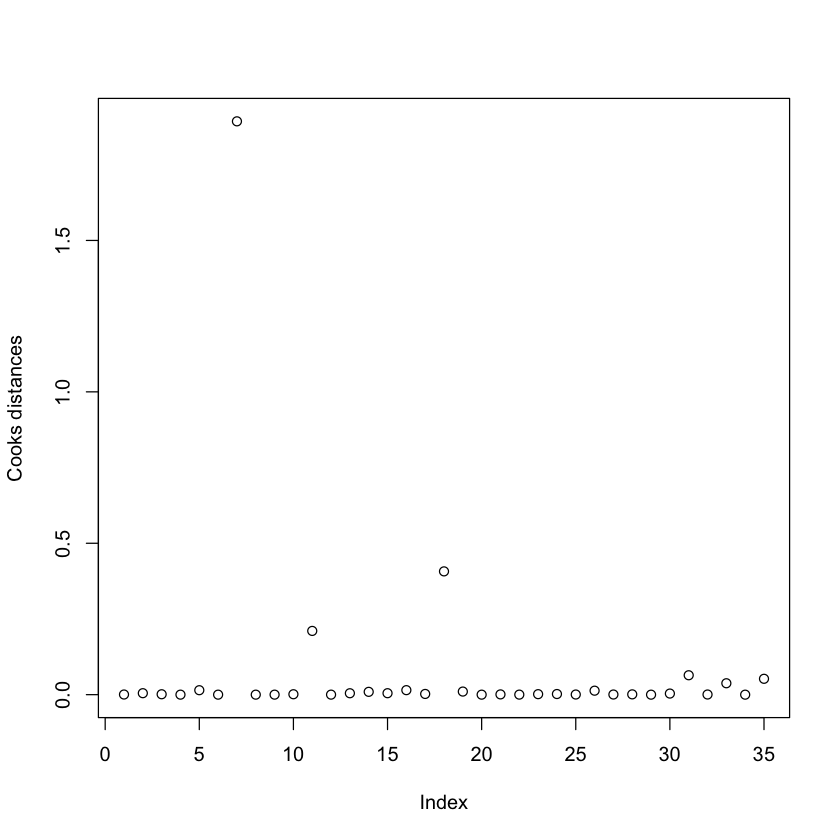

In [19]:
cook = cooks.distance(lm)
plot(cook,ylab="Cooks distances")
cook[which(cook > 4/n)]

(fits <- 2 * sqrt((p + 1) / (n - p - 1)))
dfit = dffits(lm)

dfit[which(dfit > fits)]

Cook's distance using 4/n as threshold for identifying influential points and DFFITS using 2 * sqrt((p + 1) / (n - p - 1)) as the threshold both identify Bens of Jura, Lairig Ghru and Knock Hill as influential points.

It seems that there are 1 or 2 outliers and 3 influential points, but these data points are not data entry errors, nor are they from a different population than most of the data and I have no compelling reason to exclude them from the analysis. Thus, I turn to robust regression, which allow me to compromise between excluding these points entirely from the analysis and including all the data points and treating all them equally in OLS regression.


In [31]:
(lms)

rr.huber <- rlm(time ~ dist + climb, data = hills)
(huber.summary <- summary(rr.huber))

rr.tukey <- rlm(time ~ dist + climb, data = hills, psi = psi.bisquare)
(tukey.summary <- summary(rr.tukey))


Call:
lm(formula = time ~ dist + climb, data = hills)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.215  -7.129  -1.186   2.371  65.121 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.992039   4.302734  -2.090   0.0447 *  
dist         6.217956   0.601148  10.343 9.86e-12 ***
climb        0.011048   0.002051   5.387 6.45e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.68 on 32 degrees of freedom
Multiple R-squared:  0.9191,	Adjusted R-squared:  0.914 
F-statistic: 181.7 on 2 and 32 DF,  p-value: < 2.2e-16



Call: rlm(formula = time ~ dist + climb, data = hills)
Residuals:
      Min        1Q    Median        3Q       Max 
-10.75039  -3.28395  -0.03358   3.53791  65.70100 

Coefficients:
            Value   Std. Error t value
(Intercept) -9.6067  1.7545    -5.4754
dist         6.5507  0.2451    26.7237
climb        0.0083  0.0008     9.9199

Residual standard error: 5.209 on 32 degrees of freedom


Call: rlm(formula = time ~ dist + climb, data = hills, psi = psi.bisquare)
Residuals:
     Min       1Q   Median       3Q      Max 
-10.8333  -2.6738   0.3937   3.6004  64.5814 

Coefficients:
            Value   Std. Error t value
(Intercept) -8.1207  1.4883    -5.4563
dist         6.6382  0.2079    31.9241
climb        0.0065  0.0007     9.1614

Residual standard error: 4.781 on 32 degrees of freedom

In [29]:
#Tukey bootstrap
g <- rlm(time ~ ., data = hills, nsamp = "exact")
bcoef <- matrix(0, 1000, 3)
for (i in 1:1000) {
    newy <- predict(g) + residuals(g)[sample(length(hills$time), replace = TRUE)]
    bbs <- lqs(newy ~ . -time, data = hills, nsamp = "best")
    bcoef[i, ] <- bbs$coef
}

sd(bcoef[, 3])

quantile(bcoef[, 3], probs = c(0.025, 0.975))

g

Warning message:
In rlm.default(x, y, weights, method = method, wt.method = wt.method, : some of ... do not match

[1] 0.002142659

2.5%       97.5% 
0.003908858 0.012516578

Call:
rlm(formula = time ~ ., data = hills, nsamp = "exact")
Converged in 10 iterations

Coefficients:
 (Intercept)         dist        climb 
-9.606716592  6.550722947  0.008295854 

Degrees of freedom: 35 total; 32 residual
Scale estimate: 5.21 